#Food Hub Data Analysis

### Context
A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. Food Hub earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

Food Hub has stored the data of the different orders made by the registered customers in their online portal. **They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience.** 

Perform the data analysis to find insights that will help the improve the business. 


### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# read the data
df = pd.read_csv('foodhub_order.csv')

# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

*     The DataFrame has 9 columns as mentioned in the Data Dictionary. 
*     Data in each row corresponds to the order placed by a customer.

In [5]:
df.shape

(1898, 9)

#### Observations:

*     The DataFrame has 1898 rows and 9 columnns.


In [6]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
*    There are no null values present in this DataFrame. Every column has a value. However, the 'rating' column is listed as a object due to a 'not given' value assigned to rows where the customer did not provide a rating for their order.

*    This is important to make note of because statistical summaries and aggregations cannot be preformed on type object. This column will need to be cast to type int64 by changing 'not given' values to NaN.

In [7]:
# checking the unique values in rating column
df.rating.unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [8]:
# creating a copy of the data frame to make changes without affecting the original data
dfc= df.copy()
# replacing values with NaN
dfc['rating'] = dfc['rating'].replace('Not given', np.nan)
# changing column datatype
dfc['rating'] = dfc['rating'].astype(float)

In [9]:
#checking the new data types
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 133.6+ KB


In [10]:
# taking a sum of the null values
dfc.isnull().sum()

order_id                   0
customer_id                0
restaurant_name            0
cuisine_type               0
cost_of_the_order          0
day_of_the_week            0
rating                   736
food_preparation_time      0
delivery_time              0
dtype: int64

In [11]:
# calculating the the percentage of null values are in the DataFrame
nanpct = dfc.rating.isnull().sum()
n_values = dfc.shape[0] * dfc.shape[1]

# null percent of whole
print('NaN values in the rating column affect', round(nanpct/n_values * 100, 3), ' of the total values in the DataFrame.')

# null percent in total observations (rows)
print('NaN values in the rating column affect', round(nanpct/dfc.shape[0] * 100,3), ' of the total rows in the DataFrame.')

NaN values in the rating column affect 4.309  of the total values in the DataFrame.
NaN values in the rating column affect 38.778  of the total rows in the DataFrame.


In [12]:
dfc.rating.describe()

count    1162.000000
mean        4.344234
std         0.741478
min         3.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64

#### Observations:
*     There are 736 missing values in the ratings column accounting for 4.3% of the total data where the customer did not give a rating for their order.

*    Those rows cannot be removed because they affect 38.8% of the total rows. An effective way to treat the null values is to fill them with the mean or with the median rating if the data is skewed.

*     The average rating is 4.3 currently without treating the null values.

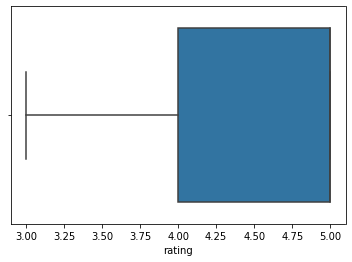

In [13]:
# checking distribution of ratings data
sns.boxplot(data=dfc,x='rating');
plt.show()

In [14]:
# Fill NaN values with Median
dfc['rating'].fillna(value=dfc['rating'].median(), inplace=True);

dfc.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [15]:
# Statistical summary of the data

dfc.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
rating,1898.0,4.598525e+00,0.662289,3.00,4.00,5.00,5.000000e+00,5.00
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


In [16]:
dfc.food_preparation_time.mean()

27.371970495258168

#### Observations:
The average food preparation time is 27.37 minutes, with the fastest prep time being 20 minutes and the longest prep time being 35 minutes.

In [17]:
dfc.rating.isnull().sum()

0

#### Observations:
*     There were 736 orders where customers did not rate their order. Now that the missing values were filled with the median order rating, there are zero orders without a rating.

### **Exploratory Data Analysis (EDA)**

### Univariate Analysis

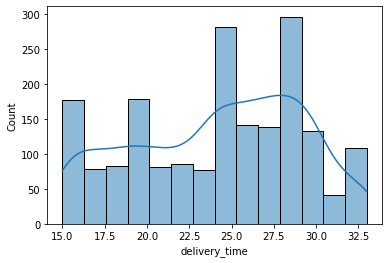

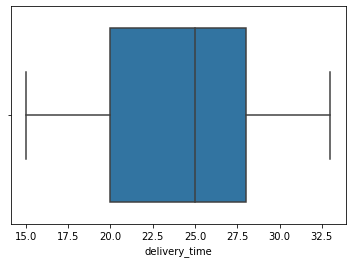

In [18]:
# Distribution of delivery time

sns.histplot(data = dfc, x='delivery_time', kde = True);
plt.show()
sns.boxplot(data = dfc, x='delivery_time');
plt.show()



*   The distribution is skewed to the left. There are no outliers present in the data. Delivery times consistently fall between 15 and 32.5 minutes.
*   The mean delivery time is 25 minutes. The shortest time is 15 minutes and the longest was 32.5 minutes.



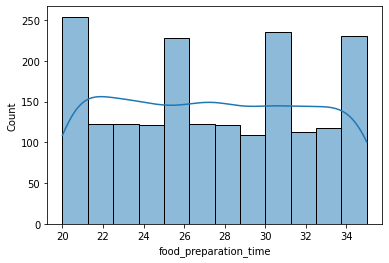

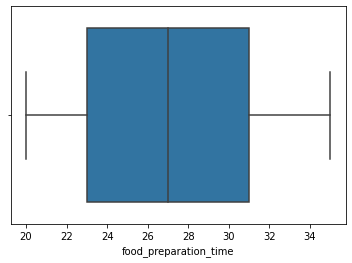

In [19]:
#Distribution of Food Preparation Time

sns.histplot(data = dfc, x='food_preparation_time', kde = True);
plt.show()
sns.boxplot(data = dfc, x='food_preparation_time');
plt.show()



*   The mean food preparation time is around 27 minutes. All food orders have been completed within 20 to 35 minutes.
*   There were around 250 occurances of orders taking 20-21 minutes.



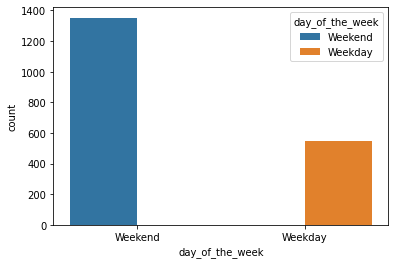

In [20]:
#Weekday and Weekend distribution of orders

sns.countplot(data = dfc, x = 'day_of_the_week', hue= 'day_of_the_week');
plt.show()



*   Most orders are placed on the weekend than during the week. Only about a fourth of all orders were placed during the week.


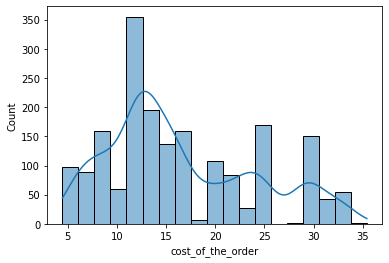

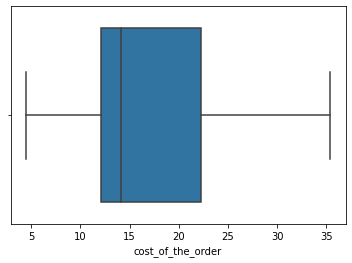

In [21]:
#Cost of order distribution

sns.histplot(data = dfc, x = 'cost_of_the_order', kde= True);
plt.show()

sns.boxplot(data = dfc, x = 'cost_of_the_order');
plt.show()



*   The average cost of orders is around $14.
*   The distribution is skewed to the right.
*   Most orders are between 12 and 22 dollars.



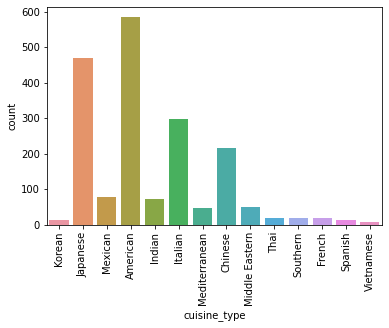

In [22]:
#Cuisine Type 

sns.countplot(data = dfc, x= 'cuisine_type');
plt.xticks(rotation = 90)
plt.show()



*   American, Japanese, Italian and Chinese are the most popular food types ordered by users on FoodHub.
*   Korean and Vietnames are ordered the least.



In [23]:
# number of orders placed with each restaurant
restaurants = dfc.groupby('restaurant_name').agg(orders_count=('order_id', 'count')).reset_index()
restaurants['pct_total_orders'] = restaurants.orders_count/dfc.shape[0] * 100

print('-'*100, '\n', restaurants.sort_values(by= 'orders_count',ascending=False).head(10))

# most frequent value
print('-'*100,'\n','Order count mode:', restaurants.orders_count.mode())

print('-'*100, '\n', 'FoodHub Users have placed orders from', restaurants.shape[0], 'restaurants')

---------------------------------------------------------------------------------------------------- 
                    restaurant_name  orders_count  pct_total_orders
136                    Shake Shack           219         11.538462
153              The Meatball Shop           132          6.954689
21               Blue Ribbon Sushi           119          6.269758
20       Blue Ribbon Fried Chicken            96          5.057956
109                           Parm            68          3.582719
121               RedFarm Broadway            59          3.108535
122                 RedFarm Hudson            55          2.897787
145                            TAO            49          2.581665
66                     Han Dynasty            46          2.423604
22   Blue Ribbon Sushi Bar & Grill            44          2.318230
---------------------------------------------------------------------------------------------------- 
 Order count mode: 0    1
dtype: int64
-------------------

*   Orders to Shake Shack make up 11.53% of the total orders place through FoodHub. They have recieved 219 orders.
*   There are 178 distinct restaurants users have placed orders with.
*   Most restaurants have only recieved one order through FoodHub.

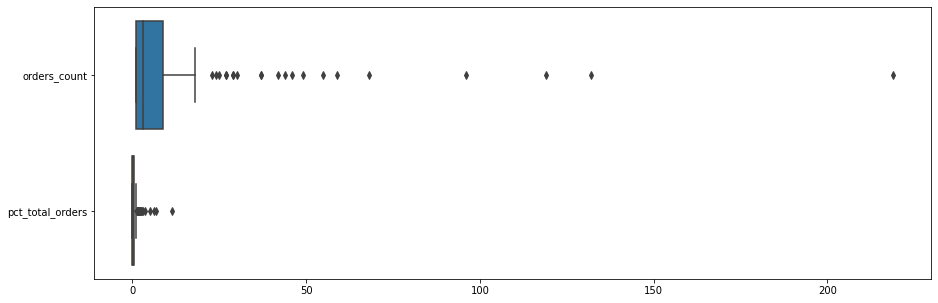

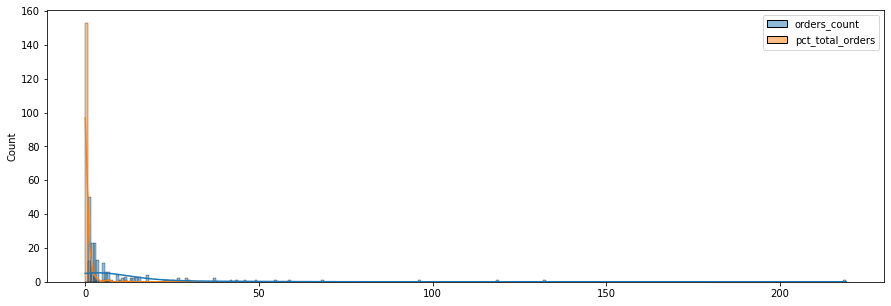

In [24]:
# order count distributions
plt.figure(figsize=(15,5))
sns.boxplot(data = restaurants, orient = 'h');
plt.show()

plt.figure(figsize=(15,5))
sns.histplot(data = restaurants, kde = True);
plt.show()



*   The distribution of number of orders placed at each restaurant is extremeley right skewed. 
*   The vast majority of restaurants have only recieved one order through Foodhub. 



In [25]:
# counting the number of total unique users and frequent users
all_users= set()
frequent_users = set()
for user in dfc['customer_id']:
  if user not in all_users:
    all_users.add(user)
  elif user in all_users:
    frequent_users.add(user)

print('There are', len(all_users),'total users for FoodHub')
print('There are', len(frequent_users),'users that have ordered more than once using FoodHub')
print(len(all_users)-len(frequent_users), 'users have only ordered once using FoodHub')

There are 1200 total users for FoodHub
There are 416 users that have ordered more than once using FoodHub
784 users have only ordered once using FoodHub


### Which are the top 5 restaurants in terms of the number of orders received?

In [26]:
dfc.groupby('restaurant_name')['order_id'].nunique().sort_values(ascending=False).head()

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: order_id, dtype: int64

#### Observations:

The most ordered from restaurant is Shake Shack with 219 orders placed, followed by the Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and lastly Parm wih 68 orders.

### Which is the most popular cuisine on weekends? [1 mark]

In [27]:
dfc.loc[dfc['day_of_the_week'] == 'Weekend'].groupby('cuisine_type')['order_id'].nunique()

cuisine_type
American          415
Chinese           163
French             13
Indian             49
Italian           207
Japanese          335
Korean             11
Mediterranean      32
Mexican            53
Middle Eastern     32
Southern           11
Spanish            11
Thai               15
Vietnamese          4
Name: order_id, dtype: int64

#### Observations:
The most popular food ordered on the weekend is American followed by Japanese, Italian and Chinese.

The least ordered food type is Vietnamese.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [28]:
# Locate the orders in the DataFrame that were more that $20
order20 = dfc.loc[dfc['cost_of_the_order']>20].shape[0]

# Dividing count of orders more than $20 by the total number of orders
order20 /dfc.shape[0] * 100

29.24130663856691

#### Observations:
29.24% of the orders placed on Foodhub cost more than $20.

### What is the mean order delivery time?

In [29]:
dfc.delivery_time.mean()

24.161749209694417

#### Observations:
The average (mean) delivery time for FoodHub orders is 24 minutes.

### The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed.

In [30]:
# Identifying the top 5 frequent customers
dfc.groupby('customer_id')['order_id'].count().sort_values(ascending = False).head()

customer_id
52832     13
47440     10
83287      9
250494     8
65009      7
Name: order_id, dtype: int64

#### Observations:
The most frequent customer ordered meals 13 times through FoodHub.

### **Multivariate Analysis**

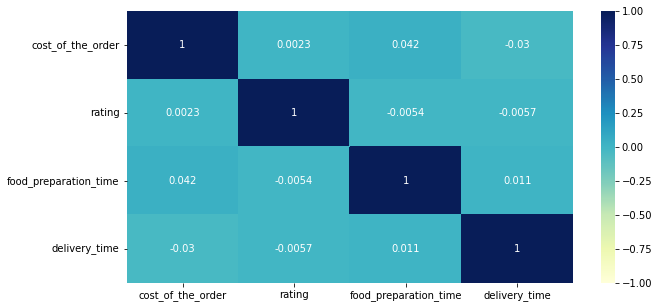

In [31]:
# finding the correlation between variable in the DataFrame, exluding order and customer ID
cols = dfc.iloc[:, 2:]

plt.figure(figsize=(10,5))
sns.heatmap(cols.corr(),annot=True, cmap= 'YlGnBu',vmin=-1,vmax=1);
plt.show()


Observations:
*   There are no strong correlations between any of the variables.


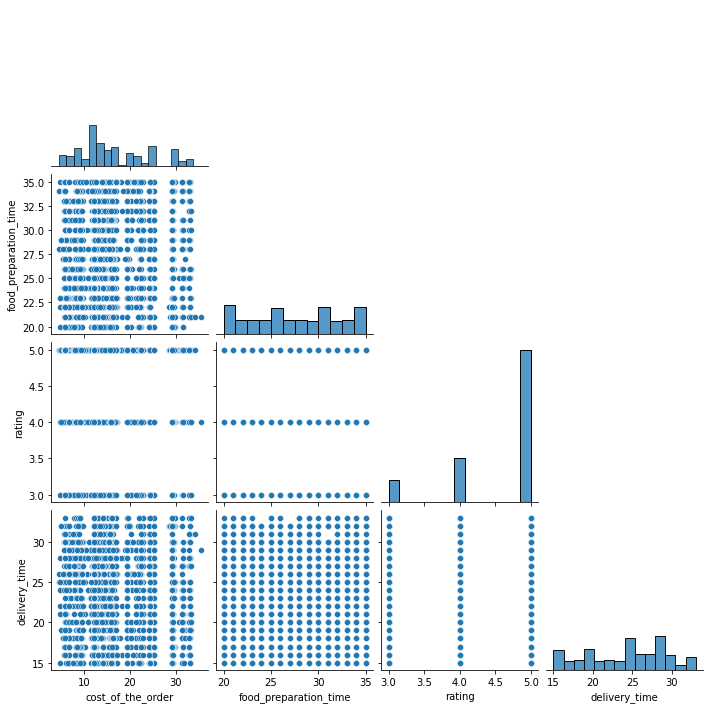

In [32]:
# Plotting the relationship between the numerical variables within the DataFrame
sns.pairplot(data=dfc[['cost_of_the_order', 'food_preparation_time', 'rating', 'delivery_time']], corner = True);
plt.show()

Observations:
*   There aren't any strong relationships between these variables.

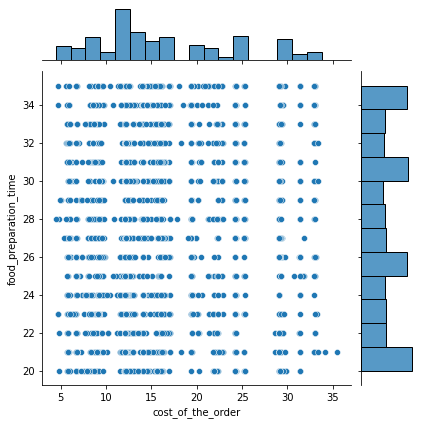

In [33]:
#joinplot between food prep and cost of the order

sns.jointplot(data = dfc, x = 'cost_of_the_order', y ='food_preparation_time');
plt.show()

Observations:
*   There seems to be no obvious correlation between these variable.

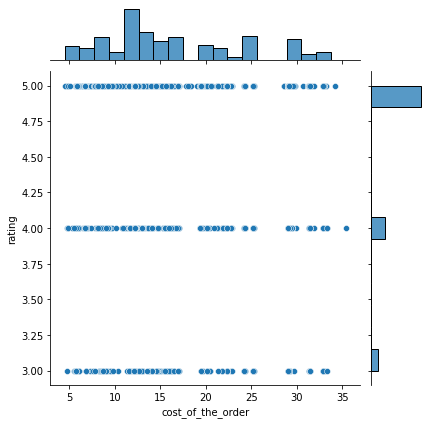

In [34]:
# Jointplot between cost and rating 
sns.jointplot(data = dfc, x = 'cost_of_the_order', y ='rating');
plt.show()

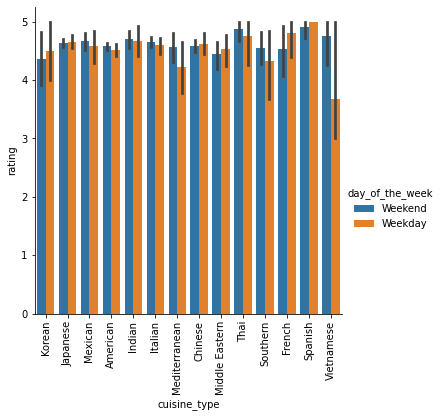

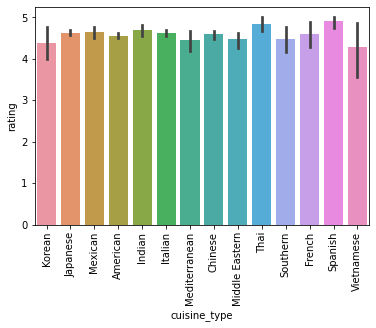

In [35]:
# Exploring the relationship between the cuisine type, day of the week and rating

sns.catplot(data = dfc, x = 'cuisine_type', y = 'rating', hue = 'day_of_the_week', kind = 'bar');
plt.xticks(rotation = 90)
plt.show()

sns.barplot(data = dfc, x = 'cuisine_type', y = 'rating');
plt.xticks(rotation = 90)
plt.show()

*      Day of the week does not influence the rating for a specific cuisine type.
* Ratings between cuisine types are similar as well. 

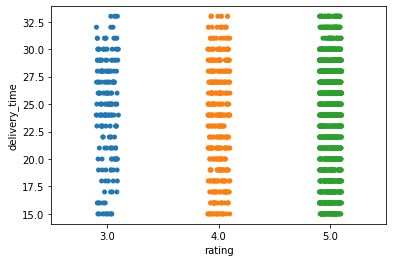

In [36]:
# Exploring the relationship between rating and delivery time
sns.stripplot(data = dfc, x = 'rating', y = 'delivery_time', dodge= True);
plt.show()

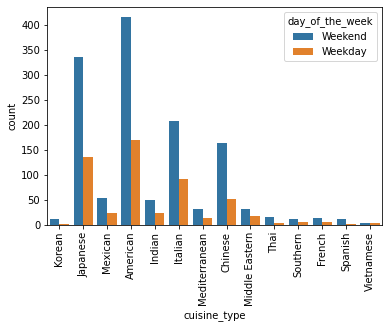

In [37]:
# Exploring the relationship between cusine type orders and the day of the week
sns.countplot(data = dfc, x = 'cuisine_type', hue = 'day_of_the_week');
plt.xticks(rotation = 90)
plt.show()

*     American, Japanese, Italian and Chinese food restaurants experience highers volumes of orders during the weekend than during the week.

###  The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.

In [38]:
# Restaurants that have 50+ reviews and avg rating of 4+ 
ratings_n = dfc.groupby('restaurant_name').agg(rating_count=('rating', 'count'),
                                               avg_rating=('rating', 'mean'),
                                               order_count=('order_id', 'count'))

# Applying the conditions
ratings_n.loc[(ratings_n['rating_count'] > 50) & (ratings_n['avg_rating'] > 4)]

,rating_count,avg_rating,order_count
restaurant_name,,,
Blue Ribbon Fried Chicken,96,4.552083,96
Blue Ribbon Sushi,119,4.521008,119
Parm,68,4.500000,68
RedFarm Broadway,59,4.474576,59
RedFarm Hudson,55,4.490909,55
Shake Shack,219,4.561644,219
The Meatball Shop,132,4.689394,132


#### Observations:
*      There are 7 restaurants that would qualify for the promotional offer.
*     The meatball Shop has the highest rating of 4.68.

### The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. What is their revenue?

In [39]:
# generating the revenue from each order

revenue_per_order = []
for cost in df['cost_of_the_order']:
  if cost >= 20:
    revenue_per_order.append(round(cost * .25,2))
  elif cost >= 5:
    revenue_per_order.append(round(cost * .15, 2))
  else:
      revenue_per_order.append(0)

dfc['revenue_per_order'] = revenue_per_order

# verifying columnn has been added correctly to the dataframe
dfc.head(1)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue_per_order
0,1477147,337525,Hangawi,Korean,30.75,Weekend,5.0,25,20,7.69


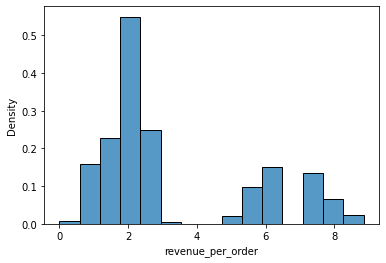

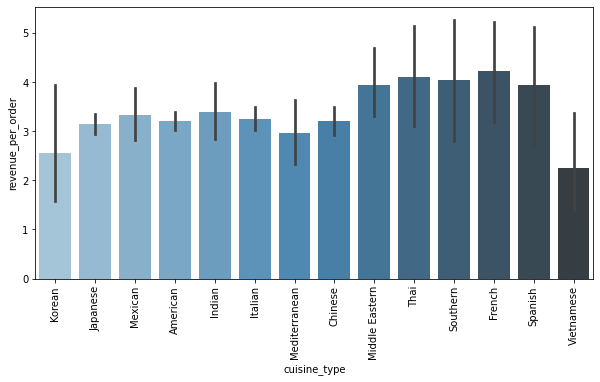

----------------------------------------------------------------------------------------------------


count    1898.000000
mean        3.248946
std         2.295686
min         0.000000
25%         1.810000
50%         2.120000
75%         5.577500
max         8.850000
Name: revenue_per_order, dtype: float64

In [40]:
# Plotting the density of revenue per order
sns.histplot(data=dfc,x='revenue_per_order',stat='density');
plt.show()

# Revenue per cuisine type barplot
plt.figure(figsize=(10,5))
sns.barplot(data=dfc,x='cuisine_type',y='revenue_per_order', palette = 'Blues_d');
plt.xticks(rotation=90)
plt.show()

# Statistical summary of revenue column
print('-' * 100)
dfc.revenue_per_order.describe()

In [41]:
print(' FoodHub made', dfc.revenue_per_order.sum(), 'in revenue from ', dfc.shape[0], 'orders.')

 FoodHub made 6166.5 in revenue from  1898 orders.


#### Observations:
*     FoodHub's net revenue is 6166.50 dollars, earning more per order from Thai, French, Spanish and Southern restaurants. 

*     The max earnings from an order was 8.85 dollars. With most orders earning 2 dollars in revenue.

### What percentage of orders take more than 60 minutes to get delivered from the time the order is placed?

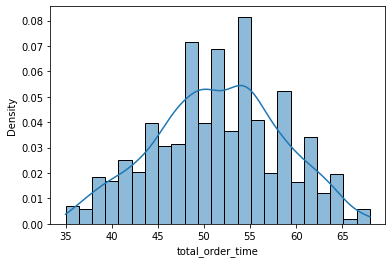

In [42]:
# creating new column with total order time
dfc['total_order_time'] = dfc['food_preparation_time'] + dfc['delivery_time']

# plotting the density of order times
sns.histplot(data=dfc, x='total_order_time', stat='density', kde = True);
plt.show()

In [43]:
# Statistical summary of order time column
dfc.total_order_time.describe()

count    1898.000000
mean       51.533720
std         6.833603
min        35.000000
25%        47.000000
50%        52.000000
75%        56.000000
max        68.000000
Name: total_order_time, dtype: float64

In [44]:
# Finding the percent of the total orders where the total order time was greater than 60 minutes
pct_long_order = dfc.loc[dfc['total_order_time'] >= 60].shape[0] / dfc.shape[0] * 100

print(round(pct_long_order, 2),'%')

12.91 %


#### Observations:
*     12.91% of all orders took an hour or more for the customer to receive their food after placing their order in the app. 

*     50% of users received their orders within 52 minutes of placing their order through the app.

### How does the mean delivery time vary during weekdays and weekends? 

In [45]:
# Avg delivery time on weekends vs weekdays
dfc.groupby('day_of_the_week').agg(avg_delivery=('delivery_time', 'mean'),
                                   order_count=('order_id', 'count'))

,avg_delivery,order_count
day_of_the_week,,
Weekday,28.340037,547
Weekend,22.470022,1351


#### Observations:
*     The delivery time is longer during the week than during the weekend even though there are more orders placed on the weekend.

*     There were 1351 orders placed on the weekend with an avg delivery time of 22 minutes, compares to the 547 orders placed during the week with a 28 minute average delivery time.


### Conclusion and Recommendations

### Conclusions:
* The average meal cost is $14. FoodHub's earns 15% in revenue from the vast majority of the orders placed with them.  
*  Users are also more likey to place an order on the weekend than during the week. 
*  On average, it takes users 51 min to recieve their food after placing their order through the app.
*  American, Japanese, Italian and Chinese are the most popular food types ordered by users on FoodHub.  

### Recommendations:

*  To increase revenue, FoodHub will need to increase its user base size and their number of orders during the week. 
*  To increase user activity and encourage new users, FoodHub should initiate their promotional offers to reward the most frequents users, and provide a discount on the most ordered from restaurants.
*  To increase more restaurants to partner with Foodhub and recieve orders from the app, the restaurant owners should be presented with the ratings data. The average rating of restaurants already using Foodhub is 4.5 stars. This could encourage more patrons for the restaurants and increase their business as well. 